In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering con Python


### Importar el dataset

In [2]:
import pandas as pd

In [ ]:
# con el dataset del vino, vamos a estudiar los compuestos químicos del vino y la nota (quality) que se le ha asignado para predecir la calidad de otro vino nuevo

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/wine/winequality-red.csv", sep = ";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

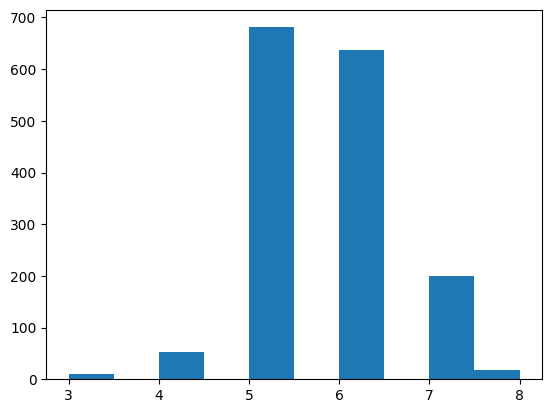

In [7]:
plt.hist(df["quality"])

In [8]:
df.groupby("quality").mean()
# sacamos la media de cada caracteristica dependiendo de la calidad.
# observamos que cuanto más volatile acidity, peor nota
# con los chlorides tambien
# a mayor sulfato, mejor
# a mayor acido citrico, mejor
# la dendidad parece que no influye, el pH tampoco, el residual sugar tampoco. la fixed acidity tampoco
# luego tenemos columnas que son muy variables: free sulfur dioxide, total sulfur dioxide

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [ ]:
# dado que hay columnas con datos muy variopintos: unos están en el entorno de 8, otros en el entorno del 0.X, otros entre 20 y 50......entonces, vamos a normalizar 

##Normalización de los datos

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# le ponemos 6 número de cluster (las notas)

In [11]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [12]:
# aquí vemos cada una de las muestras a qué cluster pertenece
md_h = pd.Series(clus.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

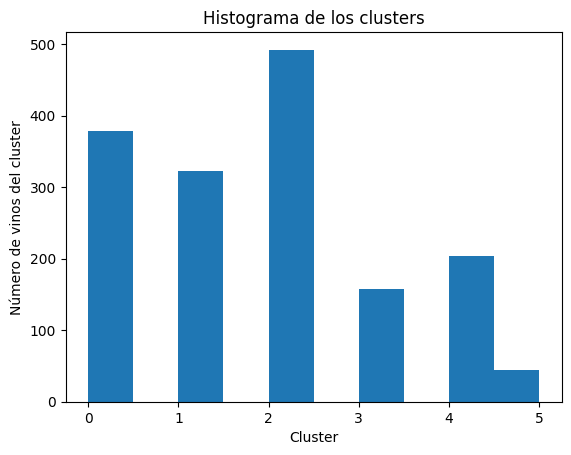

In [13]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [14]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
Z = linkage(df_norm, "ward")

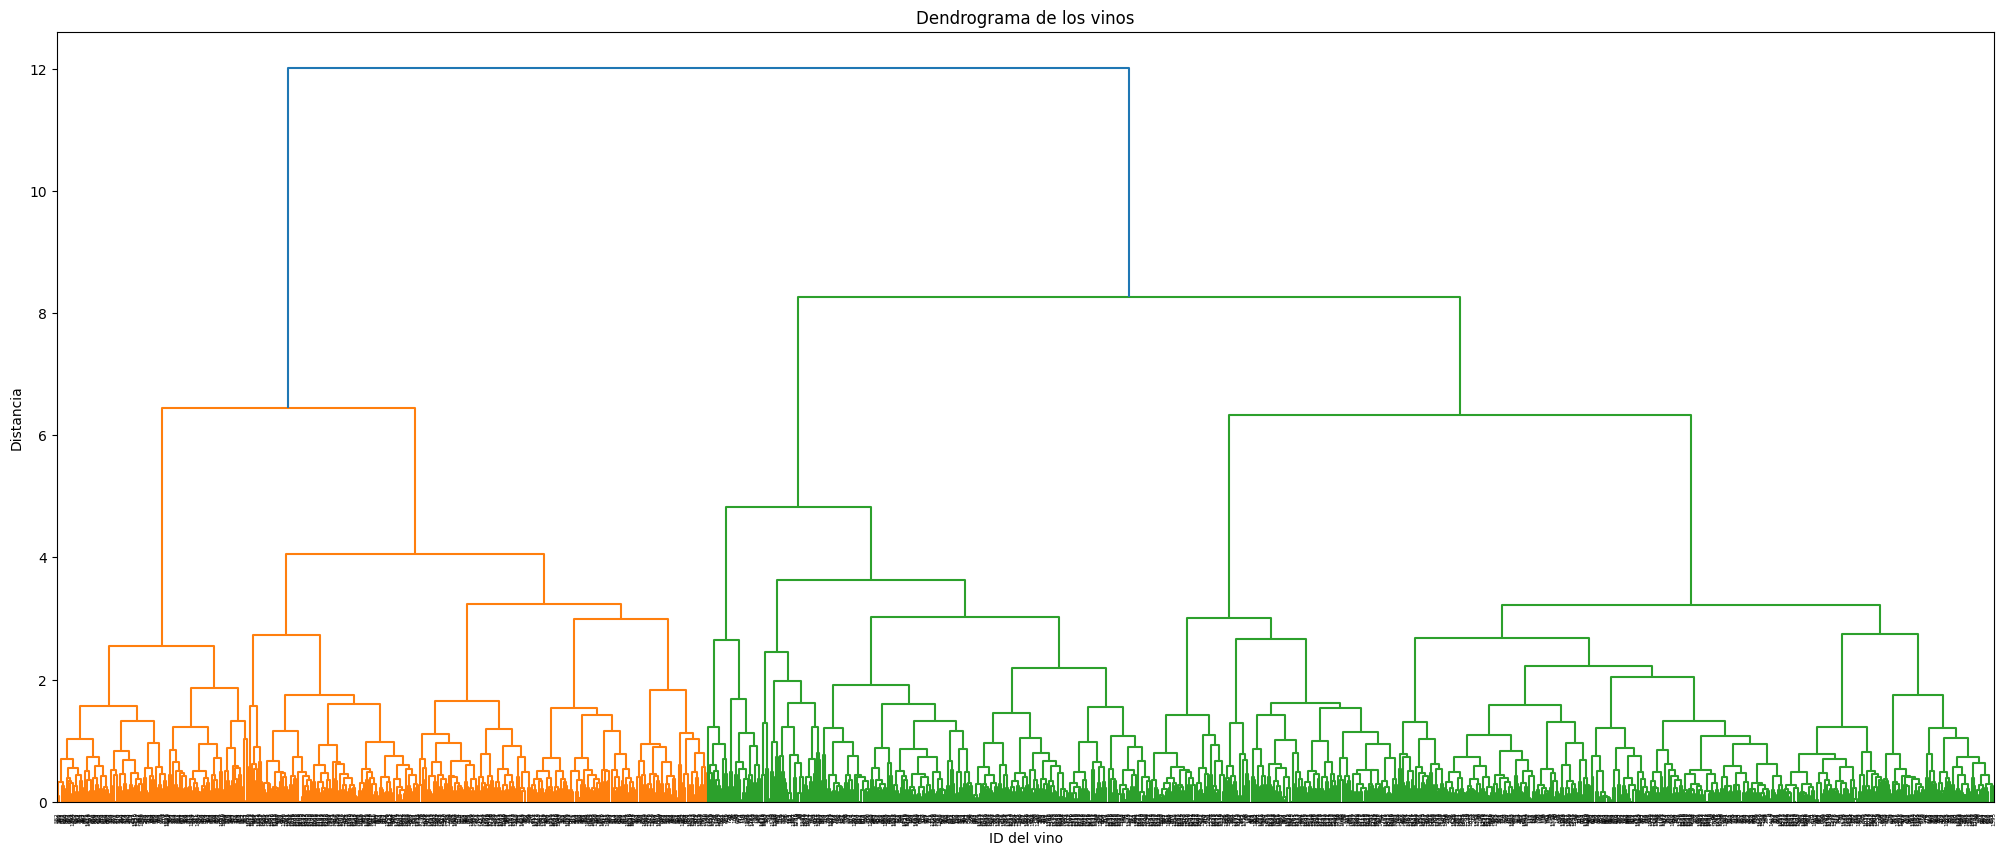

In [17]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

In [ ]:
# si cortamos por algo por encima de 4, obtenemos los 6 cluster

In [ ]:
# hacemos ahora un clustering con k-means

## K-means

In [24]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [29]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [30]:
model.labels_  # con esto vemos a qué cluster pertenece cada vino

array([3, 3, 3, ..., 2, 2, 0], dtype=int32)

In [31]:
md_k = pd.Series(model.labels_) 

(array([276.,   0., 318.,   0., 222.,   0., 508.,   0., 247.,  28.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

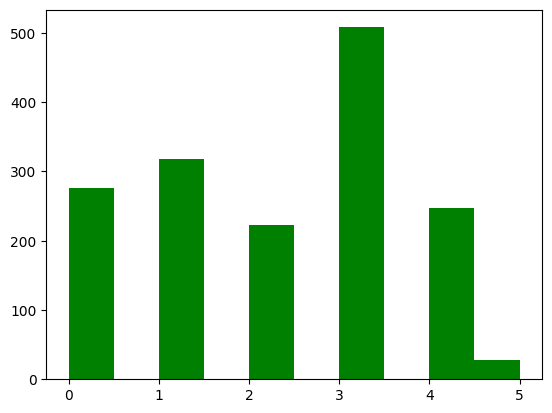

In [38]:
plt.hist(md_k, color="g")

In [33]:
# añado al dataset original normalizado las dos columnas con las distinciones de cluster de scikit y k-means

df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [34]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,3
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,3
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3


In [35]:
model.cluster_centers_
#obtenemos los centroides de los 6 clusters (tienen 12 valores cada uno porque son las 12 variables que hay=12 dimensiones)

array([[0.36379726, 0.15968867, 0.42018182, 0.1033873 , 0.10668083,
        0.16076825, 0.08358497, 0.41585903, 0.4207874 , 0.23623299,
        0.47960839, 0.69090909],
       [0.31733177, 0.27929267, 0.30421384, 0.15202033, 0.12708812,
        0.3782886 , 0.29644199, 0.54024788, 0.43579458, 0.17849207,
        0.21275601, 0.45345912],
       [0.17380212, 0.32327533, 0.09274775, 0.09397754, 0.095685  ,
        0.2534894 , 0.12677872, 0.32195962, 0.57884656, 0.18600637,
        0.49226149, 0.61261261],
       [0.26251369, 0.35927954, 0.11834971, 0.0915238 , 0.12323421,
        0.14536927, 0.10697897, 0.49049849, 0.48752378, 0.15553569,
        0.22154551, 0.44165029],
       [0.58249436, 0.20765626, 0.51105263, 0.13451833, 0.13089968,
        0.13816502, 0.0918871 , 0.65661358, 0.3306449 , 0.22332663,
        0.29029378, 0.5465587 ],
       [0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451,

In [ ]:
# la suma de los cuadrados internos dividido por la suma de los cuadrados totales (factor para ver la eficiencia del modelo): coef de inercia

In [36]:
model.inertia_  # esto es la suma de los cuadrados internos

186.5483901192215

In [ ]:
# observamos que ambos modos nos dan cluster parecidos, vemos en el histograma azul y verde que la división es parecida

## Interpretación final

In [ ]:
# nuestro cluster se puede usar para colocar un precio a cada una de las muestras obtenidas, es decir, cada cluster tendría un precio parecido
# a su vez, cada cluster podría estar enfocado a un tipo de cliente distinto con una campaña de marketing distinta

In [ ]:
# (USANDO K-MEANS) agrupamos las variables por clust_k
# # sacamos la media de cada caracteristica dependiendo de clust_k.

In [39]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.363441,0.160003,0.419783,0.103484,0.106645,0.160339,0.083397,0.416177,0.420632,0.235854,0.478930,0.690580,0.134058
1,0.317332,0.279293,0.304214,0.152020,0.127088,0.378289,0.296442,0.540248,0.435795,0.178492,0.212756,0.453459,1.053459
2,0.173802,0.323275,0.092748,0.093978,0.095685,0.253489,0.126779,0.321960,0.578847,0.186006,0.492261,0.612613,3.450450
3,0.262508,0.359501,0.117972,0.091448,0.123286,0.145572,0.107127,0.490473,0.487739,0.155583,0.221406,0.441339,2.023622
4,0.582494,0.207656,0.511053,0.134518,0.130900,0.138165,0.091887,0.656614,0.330645,0.223327,0.290294,0.546559,2.064777
5,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000


In [ ]:
# estudiamos estos datos:

# la fixed acidity, volatile acidity, residual sugar y alcohol: tienen gran influencia

# imaginemos que queremos ofrecer vinos a gente que le guste con más volumen de alcohol: le ofrecemos el 0 y el 2
# si hacemos caso de la nota de soumelier, ofreceremos el 0 y el 2